In [ ]:
import math
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from datetime import timedelta
from queue import Queue

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(range(1,69))

In [ ]:
# Resort network created manually from 2021 Crested Butte trail map
# Run lengths courtesy of https://jollyturns.com/resort/united-states-of-america/crested-butte-mountain-resort
# Lift capacities courtesy of https://www.skiresort.info/ski-resort/crested-butte/ski-lifts/
# Lift durations courtesy of https://travelcrestedbutte.com/hurry-fastest-crested-butte-ski-lifts/
#start node, end node, length (mi), type, lift capacity/hr, lift duration (min)
run_arr = [[1,42,1.48,'LI',2400,7], #silver queen (quad), 40 people (10 chairs) per minute
           [1,44,1.07,'LI',2400,5], #red lady (quad), 40 people (10 chairs) per minute
           [2,3,0.18,'LI',1500,3.5], #peachtree (double), 25 people (~13 chairs) per minute
           [2,5,0.33,'LI',1800,4], #west wall (quad), 30 people (~8 chairs) per minute
           [9,12,0.47,'LI',1800,5.5], #gold link (triple), 30 people (10 chairs) per minute
           [21,12,0.36,'LI',1800,4], #painter boy (triple), 30 people (10 chairs) per minute
           [13,15,0.47,'LI',1117,5], #prospect (quad), ~19 people (~5 chairs) per minute
           [49,44,0.43,'LI',2000,7], #teocalli (double), ~33 people (~17 chairs) per minute
           [50,66,1.08,'LI',1960,5], #paradise (quad), ~33 people (~8 chairs) per minute
           [53,55,0.65,'LI',2400,5], #east river (quad), 40 people (10 chairs) per minute
            
           
           [45,50, 0.50,'BK',0,0], #added green runs
           [63,69, 0.35,'BK',0,0],
           [63,70, 0.35,'BK',0,0],
           [69,70, 0.15,'BK',0,0],
           [70,50, 0.15,'BK',0,0],
           [63,71, 0.25,'BK',0,0],
           [71,69, 0.15,'BK',0,0],
           [71,70, 0.15,'BK',0,0],
           [63,71, 0.55,'BK',0,0],
           
           #[66,55, 1.05,'BK',0,0], #added black runs at fringes
           #[66,56, 1.05,'BK',0,0],
           #[66,57, 0.65,'BK',0,0],
           #[43,2, 1.05,'BK',0,0],
           #[43,36, 0.25,'BK',0,0],
           
           #Greens
           [1,2, 0.15,'GR',0,0],
           [2,1, 0.15,'GR',0,0],
           [3,2, 0.13,'GR',0,0],
           [3,2, 0.16,'GR',0,0],
           [4,1, 0.22,'GR',0,0],
           [5,67, 0.15,'GR',0,0],
           [67,6, 0.1,'GR',0,0],
           [7,4, 0.2,'GR',0,0],
           [22,5, 0.32,'GR',0,0],
           [23,22, 0.3,'GR',0,0],
           [31,23, 0.21,'GR',0,0],
           [24,6, 0.15,'GR',0,0],
           [6,4, 0.15,'GR',0,0],
           [24,7, 0.23,'GR',0,0],
           [27,7, 0.36,'GR',0,0],
           [25,24, 0.27,'GR',0,0],
           [30,25, 0.1,'GR',0,0],
           [30,27, 0.18,'GR',0,0],
           [32,27, 0.17,'GR',0,0],
           [32,30, 0.1,'GR',0,0],
           [35,31, 0.15,'GR',0,0],
           [44,32, 0.18,'GR',0,0],
           [35,34, 0.24,'GR',0,0],
           [34,33, 0.1,'GR',0,0],
           [33,32, 0.15,'GR',0,0],
           [63,64, 0.1,'GR',0,0],
           [64,65, 0.11,'GR',0,0],
           [65,38, 0.1,'GR',0,0],
           [38,37, 0.1,'GR',0,0],
           [37,35, 0.4,'GR',0,0],
           [44,45, 0.22,'GR',0,0],
           [45,7, 0.43,'GR',0,0],
           [45,28, 0.37,'GR',0,0],
           [45,28, 0.50,'GR',0,0],
           [28,7, 0.50,'GR',0,0],
           [19,7, 0.1,'GR',0,0],
           [7,19, 0.1,'GR',0,0],
           [18,19, 0.1,'GR',0,0],
           [18,7, 0.1,'GR',0,0],
           [21,19, 0.1,'GR',0,0],
           [19,21, 0.1,'GR',0,0],
           [20,19, 0.15,'GR',0,0],
           [20,18, 0.1,'GR',0,0],
           [12,20, 0.15,'GR',0,0],
           [17,13, 0.57,'GR',0,0],
           [15,12, 0.1,'GR',0,0],
           [12,15, 0.1,'GR',0,0],
           [15,16, 0.1,'GR',0,0],
           [16,17, 0.15,'GR',0,0],
           [17,48, 0.44,'GR',0,0],
           [48,49, 0.2,'GR',0,0],
           [42,40, 0.24,'GR',0,0], #silver queen road assigned as green
           [40,66, 0.22,'GR',0,0],
           [66,63, 0.33,'GR',0,0], #paradise bowl assigned as green
           
           #Blues
           [49,52, 0.23,'BL',0,0],
           [52,53, 0.41,'BL',0,0],
           
           [8,1, 0.63,'BL',0,0],
           [8,9, 0.56,'BL',0,0],
           [5,2, 0.34,'BL',0,0],
           [10,8, 0.35,'BL',0,0],
           [10,9, 0.43,'BL',0,0],
           [12,10, 0.15,'BL',0,0],
           [12,9, 0.48,'BL',0,0],
           [12,9, 0.41,'BL',0,0],
           [12,11, 0.40,'BL',0,0],
           [11,9, 0.23,'BL',0,0],
           [11,13, 0.18,'BL',0,0],
           [15,14, 0.15,'BL',0,0],
           [14,13, 0.27,'BL',0,0],
           [16,14, 0.16,'BL',0,0],
           [12,21, 0.35,'BL',0,0],
           [29,7, 0.59,'BL',0,0],
           [44,29, 0.24,'BL',0,0],
           [37,34, 0.11,'BL',0,0],
           [66,64, 0.2,'BL',0,0],
           [66,65, 0.31,'BL',0,0],
           [63,62, 0.23,'BL',0,0],
           [64,62, 0.2,'BL',0,0],
           [65,61, 0.26,'BL',0,0],
           [62,60, 0.22,'BL',0,0],
           [62,61, 0.09,'BL',0,0],
           [62,59, 0.21,'BL',0,0],
           [60,57, 0.12,'BL',0,0],
           [61,45, 0.15,'BL',0,0],
           [61,58, 0.35,'BL',0,0],
           [45,46, 0.11,'BL',0,0],
           [45,47, 0.25,'BL',0,0],
           [45,29, 0.31,'BL',0,0],
           [46,48, 0.53,'BL',0,0],
           [59,58, 0.2,'BL',0,0],
           [58,50, 0.21,'BL',0,0],
           [47,50, 0.2,'BL',0,0],
           [47,49, 0.25,'BL',0,0],
           [50,49, 0.15,'BL',0,0],
           [57,56, 0.24,'BL',0,0],
           [57,51, 0.25,'BL',0,0],
           [57,50, 0.25,'BL',0,0],
           [56,51, 0.1,'BL',0,0],
           [55,56, 0.15,'BL',0,0],
           [56,54, 0.25,'BL',0,0],
           [56,54, 0.25,'BL',0,0],
           [51,50, 0.1,'BL',0,0],
           [51,52, 0.21,'BL',0,0],
           [54,53, 0.38,'BL',0,0],
           [55,68, 0.63,'BL',0,0],
           [68,53, 0.29,'BL',0,0],
           
           #Blacks
           [43,5, 0.75,'BK',0,0],
           [43,22, 0.5,'BK',0,0],
           [42,43, 0.1,'BK',0,0],
           [55,68, 0.34,'BK',0,0],
           [55,53, 0.41,'BK',0,0],
           [66,41, 0.2,'BK',0,0],
           [40,41, 0.1,'BK',0,0],
           [40,39, 0.1,'BK',0,0],
           [40,36, 0.1,'BK',0,0],
           [41,38, 0.15,'BK',0,0],
           [38,45, 0.19,'BK',0,0],
           [38,33, 0.13,'BK',0,0],
           [38,34, 0.13,'BK',0,0],
           [34,30, 0.18,'BK',0,0],
           [23,5, 0.2,'BK',0,0],
           [23,67, 0.41,'BK',0,0],
           [67,1, 0.30,'BK',0,0],
           [26,67, 0.34,'BK',0,0],
           [36,23, 0.4,'BK',0,0],
           [36,31, 0.24,'BK',0,0],
           [31,26, 0.1,'BK',0,0],
           [39,37, 0.17,'BK',0,0],
           [36,37, 0.1,'BK',0,0],
           [36,35, 0.12,'BK',0,0],
           [35,26, 0.12,'BK',0,0],
           [26,25, 0.1,'BK',0,0],
           [39,36, 0.1,'BK',0,0],
          ]

In [ ]:
for edge in run_arr:
    G.add_edge(edge[0], edge[1], length=edge[2], edgetype=edge[3], capacity=edge[4], duration=edge[5])
G_BK_nodes = list(G.nodes)
G_nodes = list(G.nodes)

In [ ]:
#Subgraph usable by green level groups
G_GR = nx.DiGraph()
for edge in run_arr:
    if edge[3] == 'GR' or edge[3] == 'LI':
        if (edge[0], edge[1]) not in [(9,12),(53,55),(50,66)]: #,(50,66) for paradise
            G_GR.add_edge(edge[0], edge[1], length=edge[2], edgetype=edge[3], capacity=edge[4], duration=edge[5])
G_GR_nodes = list(G_GR.nodes)

In [ ]:
#Subgraph usable by blue level groups
G_BL = nx.DiGraph()
for edge in run_arr:
    if edge[3] == 'BL'  or (edge[3] == 'GR' or edge[3] == 'LI'):
        G_BL.add_edge(edge[0], edge[1], length=edge[2], edgetype=edge[3], capacity=edge[4], duration=edge[5])
G_BL_nodes = list(G_BL.nodes)

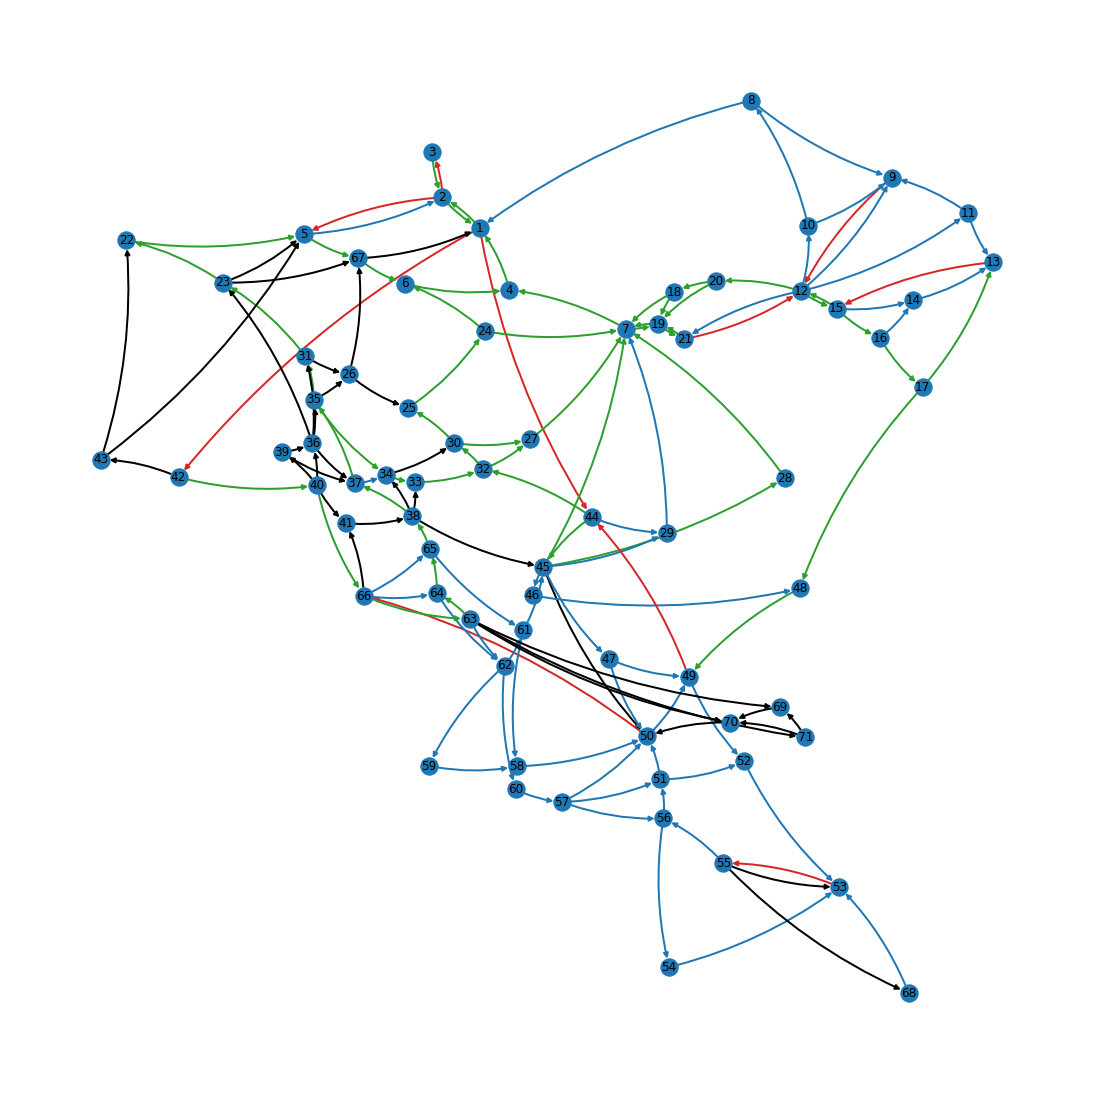

In [ ]:
#color for each type (gr, bl, bk, rd), coloring each edge
edgetype_to_color = {
    'LI': "tab:red",
    'GR': "tab:green",
    'BL': "tab:blue",
    'BK': "k"}
edges = G.edges
for u,v in edges:
    G[u][v]['color'] = edgetype_to_color[G[u][v]['edgetype']]
pos = nx.kamada_kawai_layout(G, weight='length', scale=1.5) 
edge_colors = [edgedata['color'] for _, _, edgedata in G.edges(data=True)]
plt.figure(figsize=(15,15))
nx.draw(G, pos, width=2, edge_color=edge_colors, with_labels=True, connectionstyle="arc3,rad=0.1")
plt.savefig("network.png")

In [ ]:
#critical intersections that should have yield or caution signs to reduce collisions
degs = [(n,G.degree(n)) for n in G.nodes]
print(degs)

[(1, 7), (2, 6), (3, 2), (4, 3), (5, 6), (6, 3), (7, 9), (8, 3), (9, 5), (10, 3), (11, 3), (12, 9), (13, 4), (14, 3), (15, 5), (16, 3), (17, 3), (18, 3), (19, 6), (20, 3), (21, 4), (22, 3), (23, 5), (24, 3), (25, 3), (26, 4), (27, 3), (28, 2), (29, 3), (30, 4), (31, 4), (32, 4), (33, 3), (34, 5), (35, 5), (36, 6), (37, 5), (38, 6), (39, 3), (40, 5), (41, 3), (42, 3), (43, 3), (44, 5), (45, 9), (46, 2), (47, 3), (48, 3), (49, 5), (50, 8), (51, 4), (52, 3), (53, 5), (54, 2), (55, 4), (56, 4), (57, 4), (58, 3), (59, 2), (60, 2), (61, 4), (62, 5), (63, 6), (64, 4), (65, 4), (66, 6), (67, 5), (68, 2), (69, 3), (70, 4), (71, 3)]


In [ ]:
#best places for amenities (IRL bars/restaurants at nodes 1, 12, 24, 50)
betweenness = nx.betweenness_centrality(G)
print([(v, f"{b:0.2f}") for v, b in betweenness.items()])

[(1, '0.45'), (2, '0.07'), (3, '0.00'), (4, '0.22'), (5, '0.04'), (6, '0.01'), (7, '0.35'), (8, '0.08'), (9, '0.02'), (10, '0.08'), (11, '0.01'), (12, '0.22'), (13, '0.03'), (14, '0.00'), (15, '0.09'), (16, '0.03'), (17, '0.03'), (18, '0.01'), (19, '0.17'), (20, '0.02'), (21, '0.15'), (22, '0.00'), (23, '0.03'), (24, '0.03'), (25, '0.03'), (26, '0.04'), (27, '0.06'), (28, '0.00'), (29, '0.07'), (30, '0.06'), (31, '0.02'), (32, '0.06'), (33, '0.00'), (34, '0.02'), (35, '0.05'), (36, '0.05'), (37, '0.04'), (38, '0.10'), (39, '0.01'), (40, '0.22'), (41, '0.06'), (42, '0.25'), (43, '0.01'), (44, '0.33'), (45, '0.27'), (46, '0.01'), (47, '0.03'), (48, '0.05'), (49, '0.24'), (50, '0.27'), (51, '0.08'), (52, '0.06'), (53, '0.09'), (54, '0.00'), (55, '0.09'), (56, '0.09'), (57, '0.04'), (58, '0.02'), (59, '0.00'), (60, '0.04'), (61, '0.04'), (62, '0.07'), (63, '0.08'), (64, '0.04'), (65, '0.07'), (66, '0.23'), (67, '0.09'), (68, '0.00'), (69, '0.00'), (70, '0.03'), (71, '0.00')]


In [ ]:
#using a time step of 1 minute (at first pass), 
#function to generate number of arrivals
def arrivals_this_min(rate):
    return np.random.poisson(rate)

Daily group arrivals:  2088


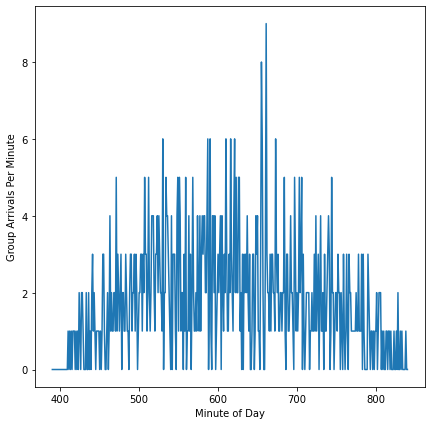

In [ ]:
# arrivals begin at 6:30am and end at 2pm, peaking at 10:15am
# number of arrivals mirrors a daily average at this resort
arrivals = []
for minute in np.arange(390,841):
    rate = - (1/20000) * (minute-390) * (minute - 840) #20000 for weekday, 8000 for weekend
    if rate >= 0:
        arrivals.append(arrivals_this_min(rate))
print('Daily group arrivals: ', int(np.sum(arrivals) * 2.66))
plt.figure(figsize=(7,7))
plt.plot(np.arange(390,841), arrivals)
plt.xlabel('Minute of Day')
plt.ylabel('Group Arrivals Per Minute')
#plt.savefig("arrivals_weekday.png")
plt.show()

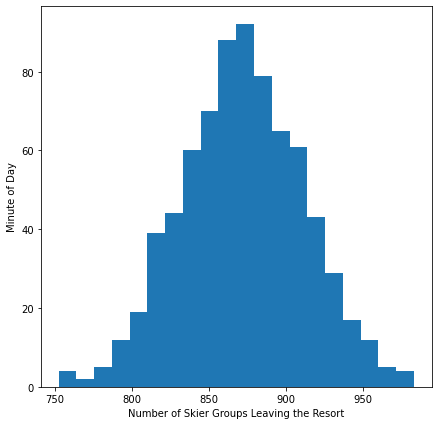

In [ ]:
# exiting the resort begins at 12:30pm at goes until 4:45pm, peaking at 2:30pm
num_groups = np.sum(arrivals)
exits = np.random.normal(870,40,750)
plt.figure(figsize=(7,7))
plt.hist(exits, bins=20)
plt.xlabel('Number of Skier Groups Leaving the Resort')
plt.ylabel('Minute of Day')
#plt.savefig("exits_weekday.png")
plt.show()

In [ ]:
#Chosen ski run level of difficulty
dest_preference = np.array([
    [1.00, 0.00, 0.00], #Beginner ('GR','BL','BK')
    [0.30, 0.70, 0.00], #Intermediate
    [0.05, 0.45, 0.50]  #Expert
])

#Distrbution of experience level of groups 
group_experience = [0.40, 0.35, 0.25]

#liklihood of group sizes (1-4)
group_size = [0.22, 0.26, 0.16, 0.36] # average: 2.66

ski_speeds = {'GR':14.5, 'BL': 23.4, 'BK': 31.07} #mph
#for sksp in ski_speeds.keys():
#    ski_speeds[sksp] += 1.7

In [ ]:
def time_durationGR(u, v, d):
    if d.get("duration", 1) > 0:
        return d.get("duration", 1)
    else:
        return (G_GR.edges[u, v]['length'] / ski_speeds['GR']) * 60
def time_durationBL(u, v, d):
    if d.get("duration", 1) > 0:
        return d.get("duration", 1)
    else:
        return (G_BL.edges[u, v]['length'] / ski_speeds['BL']) * 60
def time_durationBK(u, v, d):
    if d.get("duration", 1) > 0:
        return d.get("duration", 1)
    else:
        return (G.edges[u, v]['length'] / ski_speeds['BK']) * 60

In [ ]:
class group:
    def __init__(self, id, time):
        self.ID = id
        self.size = np.random.choice([1,2,3,4], p=group_size)
        self.level = np.random.choice(['GR','BL','BK'], p=group_experience)
        self.arrival_time = time
        self.exit_time = np.random.normal(870,40)
        self.origin = 1                               #all start at base village
        self.curr_dest = self.set_dest()
        self.curr_edge = None
        self.path = self.path_to_dest()
        self.curr_path_ind = 0
        self.time_spent_on_edge = 0
        self.total_wait_time = 0
        self.leaving = False
        self.at_resort = True
    
    #returns a new destination based on the skill level of the group, with a preference matrix
    def set_dest(self):
        if self.level == 'GR':
            dest = np.random.choice(list(set(G_GR.nodes).difference({self.origin})))
        elif self.level == 'BL':
            chosen_runtype = np.random.choice(['GR','BL','BK'], p=dest_preference[1])
            if chosen_runtype == 'BL':
                dest = np.random.choice(list(set(G_BL.nodes).difference({self.origin})))
            elif chosen_runtype == 'GR':
                dest = np.random.choice(list(set(G_GR.nodes).difference({self.origin})))
        elif self.level == 'BK':
            chosen_runtype = np.random.choice(['GR','BL','BK'], p=dest_preference[2])
            if chosen_runtype == 'BK':
                dest = np.random.choice(list(set(G.nodes).difference({self.origin})))
            elif chosen_runtype == 'BL':
                dest = np.random.choice(list(set(G_BL.nodes).difference({self.origin})))
            elif chosen_runtype == 'GR':
                dest = np.random.choice(list(set(G_GR.nodes).difference({self.origin})))
        return dest
    
    #returns a shortest path to the current destination as a list, using only the level subgraph
    def path_to_dest(self):
        if self.level == 'GR':
            path = nx.dijkstra_path(G_GR, self.origin, self.curr_dest, weight=time_durationGR)
        elif self.level == 'BL':
            path = nx.dijkstra_path(G_BL, self.origin, self.curr_dest, weight=time_durationBL)
        elif self.level == 'BK':
            path = nx.dijkstra_path(G, self.origin, self.curr_dest, weight=time_durationBK)
        self.curr_edge = (path[0], path[1])
        return path
    
    #steps forward the simulation by one minute, if reached destination, generate new one; controls exiting
    def step(self):
        if self.at_resort == False:
            return
        self.time_spent_on_edge += 1 + self.check_if_off_queue()
        
        
        if self.time_spent_on_edge >= self.edge_time_duration(self.curr_edge[0], self.curr_edge[1]):
            self.curr_path_ind += 1
            if self.curr_path_ind != (len(self.path)-1):
                self.curr_edge = (self.path[self.curr_path_ind], self.path[self.curr_path_ind+1])
                self.time_spent_on_edge = self.wait_time()
            else:
                if self.leaving == True:
                    self.at_resort = False
                    return
                self.origin = self.curr_dest
                self.curr_dest = self.set_dest()
                self.path = self.path_to_dest()
                self.curr_path_ind = 0
                self.time_spent_on_edge = self.wait_time()
                
        if (self.leaving == False) and (MASTER_CLOCK > self.exit_time): #leaving the resort
            self.leaving = True
            self.origin = self.curr_edge[1]
            if self.origin == 1:
                self.at_resort = False
                return
            self.curr_dest = 1
            self.path = self.path_to_dest()
            self.curr_path_ind = 0
            self.time_spent_on_edge = self.wait_time()
            
            

    #returns the time in minutes it takes to ski/ride this edge based on level
    def edge_time_duration(self, u, v):
        if G.edges[u, v]['duration'] > 0:
            return G.edges[u, v]['duration']
        else:
            return (G.edges[u, v]['length'] / ski_speeds[self.level]) * 60
         
    #if at a lift, adds the group to the queue; otherwise 0 wait time    
    def wait_time(self):
        if (self.leaving == True) and (self.curr_edge[0] == 1):
            return 0
        
        edge = self.curr_edge
        if edge in lift_queues.keys():
            lift_queues[edge].put(self.ID)
        
        return 0
    
    #if this id in list of groups getting popped off the lift lines, add a minute to time on edge;
    # else record no progress on edge traversal
    def check_if_off_queue(self):
        if self.curr_edge not in lift_queues.keys() :
            return 0
        else: 
            if self.ID in agents_entering_lifts:
                if self.time_spent_on_edge > 0:
                    return 0
                elif self.time_spent_on_edge == 0: 
                    self.total_wait_time += 1
                    return -1
            else: return 0

In [ ]:
def process_queues(Q):
    agents_off_queues = []
    for key in lift_queues:
        num_processed_this_lift = 0
        while (num_processed_this_lift < lift_cap[key]) and (not Q[key].empty()):
            popped = Q[key].get()
            if (num_processed_this_lift + agents[popped].size) <= lift_cap[key]:
                num_processed_this_lift += agents[popped].size
            agents_off_queues.append(popped)
    #print(agents_off_queues)
    return agents_off_queues

In [ ]:
lift_cap = {(1,42) : 40, #silver queen (quad), 40 people (10 chairs) per minute
        (1,44) : 40, #red lady (quad), 40 people (10 chairs) per minute
        (2,3) : 25, #peachtree (double), 25 people (~13 chairs) per minute
        (2,5) : 30, #west wall (quad), 30 people (~8 chairs) per minute
        (9,12) : 30, #gold link (triple), 30 people (10 chairs) per minute
        (21,12) : 30, #painter boy (triple), 30 people (10 chairs) per minute
        (13,15) : 19, #prospect (quad), ~19 people (~5 chairs) per minute
        (49,44) : 33, #teocalli (double), ~33 people (~17 chairs) per minute
        (50,66) : 33, #paradise (quad), ~33 people (~8 chairs) per minute
        (53,55) : 40} #east river (quad), 40 people (10 chairs) per minute

lift_queues = {(1,42) : Queue(0), #silver queen (quad), 40 people (10 chairs) per minute
        (1,44) : Queue(0), #red lady (quad), 40 people (10 chairs) per minute
        (2,3) : Queue(0), #peachtree (double), 25 people (~13 chairs) per minute
        (2,5) : Queue(0), #west wall (quad), 30 people (~8 chairs) per minute
        (9,12) : Queue(0), #gold link (triple), 30 people (10 chairs) per minute
        (21,12) : Queue(0), #painter boy (triple), 30 people (10 chairs) per minute
        (13,15) : Queue(0), #prospect (quad), ~19 people (~5 chairs) per minute
        (49,44) : Queue(0), #teocalli (double), ~33 people (~17 chairs) per minute
        (50,66) : Queue(0), #paradise (quad), ~33b people (~8 chairs) per minute
        (53,55) : Queue(0)} #east river (quad), 40 people (10 chairs) per minute

In [ ]:
MASTER_CLOCK = 390
agents = dict()
agents_entering_lifts = []
padded_arrivals = arrivals + [0] * 269

lift_times = []

for inst in padded_arrivals:
    MASTER_CLOCK += 1
    agents_entering_lifts = process_queues(lift_queues)
    if inst != 0:
        for i in range(inst):
            agent_id = str(timedelta(minutes=MASTER_CLOCK)) + '_' + str(i)
            agents[agent_id] = group(agent_id, MASTER_CLOCK)
            ags = agents[agent_id]
            #print(ags.ID, ags.level, ags.size, ags.path, ags.curr_edge, ags.time_spent_on_edge)
      
    for key in agents:
        agents[key].step()
    
    step = []
    for keys in lift_queues.keys():
        step.append(np.round(lift_queues[keys].qsize()/lift_cap[keys],2))

    lift_times.append(step)        
    print('Time:', MASTER_CLOCK)

Time: 391
Time: 392
Time: 393
Time: 394
Time: 395
Time: 396
Time: 397
Time: 398
Time: 399
Time: 400
Time: 401
Time: 402
Time: 403
Time: 404
Time: 405
Time: 406
Time: 407
Time: 408
Time: 409
Time: 410
Time: 411
Time: 412
Time: 413
Time: 414
Time: 415
Time: 416
Time: 417
Time: 418
Time: 419
Time: 420
Time: 421
Time: 422
Time: 423
Time: 424
Time: 425
Time: 426
Time: 427
Time: 428
Time: 429
Time: 430
Time: 431
Time: 432
Time: 433
Time: 434
Time: 435
Time: 436
Time: 437
Time: 438
Time: 439
Time: 440
Time: 441
Time: 442
Time: 443
Time: 444
Time: 445
Time: 446
Time: 447
Time: 448
Time: 449
Time: 450
Time: 451
Time: 452
Time: 453
Time: 454
Time: 455
Time: 456
Time: 457
Time: 458
Time: 459
Time: 460
Time: 461
Time: 462
Time: 463
Time: 464
Time: 465
Time: 466
Time: 467
Time: 468
Time: 469
Time: 470
Time: 471
Time: 472
Time: 473
Time: 474
Time: 475
Time: 476
Time: 477
Time: 478
Time: 479
Time: 480
Time: 481
Time: 482
Time: 483
Time: 484
Time: 485
Time: 486
Time: 487
Time: 488
Time: 489
Time: 490


In [ ]:
def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data) - window_size + 1):
        window_vals = data[i:i+window_size]
        window_moving_average = np.mean(window_vals)
        moving_averages.append(window_moving_average)
    return moving_averages

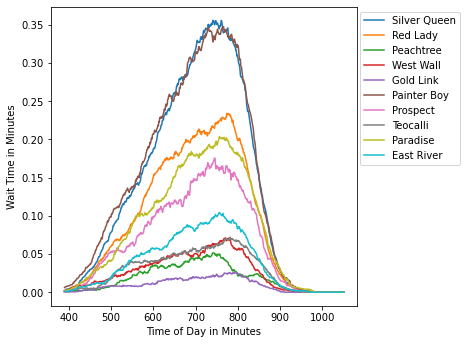

In [ ]:
#graph the wait time for each lift throughout the day
ar = np.array(lift_times)
tr = np.transpose(ar)

fig = plt.figure(figsize=(5.5,5.5))
window=60
time_axis = range(390,390+len(tr[0])-window+1)
plt.plot(time_axis, moving_average(tr[0],window), label='Silver Queen')
plt.plot(time_axis, moving_average(tr[1],window), label='Red Lady')
plt.plot(time_axis, moving_average(tr[2],window), label='Peachtree')
plt.plot(time_axis, moving_average(tr[3],window), label='West Wall')
plt.plot(time_axis, moving_average(tr[4],window), label='Gold Link')
plt.plot(time_axis, moving_average(tr[5],window), label='Painter Boy')
plt.plot(time_axis, moving_average(tr[6],window), label='Prospect')
plt.plot(time_axis, moving_average(tr[7],window), label='Teocalli')
plt.plot(time_axis, moving_average(tr[8],window), label='Paradise')
plt.plot(time_axis, moving_average(tr[9],window), label='East River')
plt.legend(bbox_to_anchor=(1.35,1),loc='upper right')
plt.ylabel('Wait Time in Minutes')
plt.xlabel('Time of Day in Minutes')
#plt.savefig("both_six_end.png") #pb_six
plt.show()

In [ ]:
maxes = []
for i in range(10):
    maxes.append(max(tr[i]))
maxes

[0.65, 0.4, 0.16, 0.2, 0.13, 0.63, 0.68, 0.21, 0.42, 0.28]

In [ ]:
time_on_mountain = []
wait_times = []
level_labels = []
size_labels = []
green_waits = []
blue_waits = []
black_waits = []
for key in agents:
    time_on_mountain.append(agents[key].exit_time-agents[key].arrival_time)
    wait_times.append(agents[key].total_wait_time)
    if agents[key].level == 'GR':
        level_labels.append('green')
        green_waits.append(agents[key].total_wait_time)
    if agents[key].level == 'BL':
        level_labels.append('blue')
        blue_waits.append(agents[key].total_wait_time)
    if agents[key].level == 'BK':
        level_labels.append('black')
        black_waits.append(agents[key].total_wait_time)
    
    if agents[key].size == 1:
        size_labels.append('red')
    if agents[key].size == 2:
        size_labels.append('green')
    if agents[key].size == 3:
        size_labels.append('blue')
    if agents[key].size == 4:
        size_labels.append('brown')
        
print('mean:', np.round(np.mean(wait_times),2), 'max lift wait:', max(maxes))
#print('min:', min(wait_times), 'max agent wait:', max(wait_times), 'max_position:', np.argmax(wait_times))
print('GR', np.round(np.mean(green_waits),2), 'BL', np.round(np.mean(blue_waits),2),'BK', np.round(np.mean(black_waits),2))

mean: 18.12 max lift wait: 0.68
GR 15.12 BL 19.72 BK 20.3


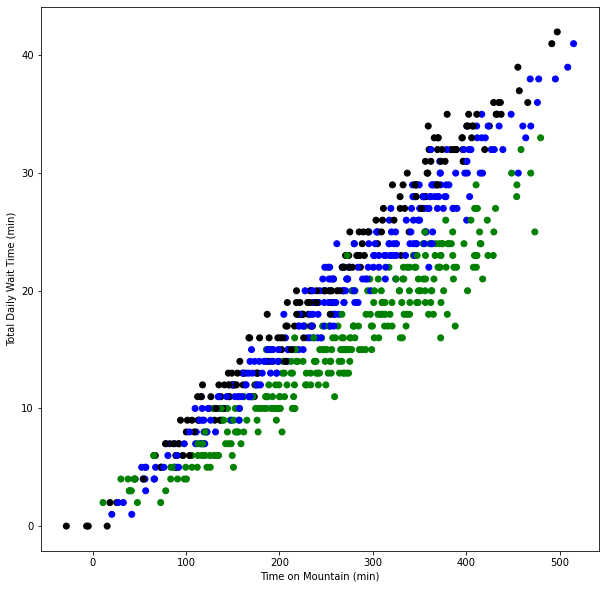

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(time_on_mountain, wait_times, color=level_labels)
plt.xlabel('Time on Mountain (min)')
plt.ylabel('Total Daily Wait Time (min)')
#plt.savefig("wait_mountain_weekday.png")
plt.show()

# adding runs, upgrading lifts, & grooming slopes for faster skiing

baseline:
- weekday mean: 17.55, 17.99, 18.18
- weekday max: 0.73, 0.67, 0.65
- weekend mean: 8.93, 8.91, 8.88
- weekend max wait at a lift: 55.92, 65.45, 59.20

upgrading painter boy to a six-pack (3000/hr, 50/min)
results:
- weekday mean: 18.29, 17.9, 18.00
- weekday max: 0.55, 0.50, 0.7
- weekend mean: 9.85, 9.15, 9.67
- weekend max wait at a lift: 55.60, 64.97, 56.12

upgrading silver queen to a six-pack (3000/hr, 50/min)
results:
- weekday mean: 
- weekday max: 
- weekend mean: 9.15, 8.94, 9.16
- weekend max wait at a lift: 58.17, 65.9, 56.13

upgrading both to a six-pack (3000/hr, 50/min)
results:
- weekday mean: 17.60
- weekday max: 0.45
- weekend mean: 10.19, 9.61, 10.42
- weekend max wait at a lift: 30.78, 34.44, 26.68

grooming all slopes (adding 1.7 km/h) 
results:
- weekday mean: 18.10, 18.15, 17.81
- weekday max: 0.7, 0.7, 0.63
- weekend mean: 8.48, 8.61, 8.47
- weekend max wait at a lift: 67.92, 61.95, 69.6

baseline:
- mean: 17.6 max lift wait: 0.63 GR 14.74 BL 18.36 BK 21.46

adding green slopes to east river lift area
results:
- mean: 8.28 max lift wait: 76.83 GR 7.64 BL 8.39 BK 9.23

blacks added to paradise and silver queen:
- mean: 8.77 max lift wait: 67.28 GR 6.52 BL 10.01 BK 10.74
- mean: 8.69 max lift wait: 62.75 GR 6.26 BL 9.88 BK 10.76
- mean: 17.8 max lift wait: 0.65 GR 14.82 BL 18.72 BK 21.32
- mean: 17.6 max lift wait: 0.73 GR 15.08 BL 18.74 BK 20.18


adding green slopes to paradise lift area
results:
- mean: 8.24 max lift wait: 46.22 GR 6.71 BL 8.91 BK 9.8
- mean: 8.1 max lift wait: 48.4 GR 6.35 BL 8.92 BK 9.78
- mean: 8.2 max lift wait: 52.45 GR 6.33 BL 9.03 BK 10.01
- mean: 17.98 max lift wait: 0.57 GR 14.44 BL 19.36 BK 21.29
- mean: 18.18 max lift wait: 0.6 GR 15.31 BL 19.24 BK 21.34
- mean: 17.55 max lift wait: 0.58 GR 15.36 BL 18.77 BK 19.49

adding blue slopes to paradise lift area
results:
- mean: 17.64 max lift wait: 0.57 GR 14.47 BL 18.49 BK 21.11
- mean: 17.93 max lift wait: 0.8 GR 15.4 BL 19.07 BK 20.78
- mean: 17.7 max lift wait: 0.63 GR 14.98 BL 19.12 BK 20.08
- mean: 8.65 max lift wait: 57.82 GR 6.32 BL 9.64 BK 11.21
- mean: 8.58 max lift wait: 60.38 GR 6.56 BL 9.4 BK 10.89
- mean: 9.01 max lift wait: 53.05 GR 6.84 BL 10.31 BK 10.39

adding black slopes to paradise lift area
results:
- mean: 8.7 max lift wait: 64.2 GR 6.48 BL 9.68 BK 10.71
- mean: 8.7 max lift wait: 62.6 GR 6.42 BL 9.67 BK 10.89
- mean: 8.23 max lift wait: 66.38 GR 5.83 BL 9.29 BK 10.62
- mean: 17.84 max lift wait: 0.73 GR 15.26 BL 18.0 BK 21.27
- mean: 17.91 max lift wait: 0.62 GR 15.1 BL 18.54 BK 21.55
- mean: 18.12 max lift wait: 0.68 GR 15.12 BL 19.72 BK 20.3